Getting started
======

**Keywords:** import, IPython notebooks

Welcome to using Underworld! 
-----

[_Underworld 2_](http://www.underworldcode.org) is a python-friendly version of the Underworld code which provides a programmable and flexible front end to all the functionality of the code running in a parallel HPC environment. This gives signficant advantages to the user, allowing them to leverage third party python libraries for model configuration, analysis at runtime, coupling of multiple physics, etc. The python toolkit was partly funded by the NeCTAR [eResearch_tools](http://www.nectar.org.au/eresearch-tools) program.

Underworld uses python and Jupyter (formerly IPython) notebooks to provide a user-friendly front end. This allows an interactive approach to building models, where cells can be re-run (or run in any order) while developing. It also allows inline visualisation via gLucifer. 

Documentation
----
Underworld documentation is broken down into: 

1. **examples**: go through the entire workflow for geophysics type problems.
2. **user guide**: a more focused look at particular aspects of Underworld (e.g. swarm particles).
3. **publications**: detailed notebooks replicating models and results from the literature. 
4. **docstrings**: docstrings are utilsed to document the Underworld API.

Underworld only requires basic knowledge of python; constructs such as lists, tuples, modules, for loops, printing and simple functions. This guide covers the basics of how to load modules for Underworld and how to use Jupyter notebooks. A short overview of a typical Underworld model with gLucifer plots is given at the end of this guide.

The purpose of this user guide is to give users a more detailed understand of the various aspects of modelling with Underworld. For those interested in getting moving as quickly as possible, the examples are perhaps a better place to start.

Underworld objects utilise python docstrings to provide documentation inline. You may access this documentation directly by using the native python ``help()`` function, for eg. ``help(underworld)``. Most objects in python and Underworld have instructions that can be accessed via the help function. Quick help information in the form of a pop-up window can be obtained by using a question mark after the object within Ipython/Jupyter notebooks; e.g. ``uw?``. There is also a custom Underworld help function (```uw.help()```) which outputs a minimal version of the object docstring.


Notebooks
----

If you are new to the Jupyter Notebook, you may wish to familiarise yourself with the notebook environment first. There are many useful examples available online. Also, when using the notebook interactively, the **Help** menu bar option provides handy references. 


Installation
----

This guide assumes that you have already installed Underworld. Details on how to install Underworld may be found at the project github page:
https://github.com/underworldcode/underworld2

How to get help
----

If you encounter issues or suspect a bug, please create a ticket using the [issue tracker on github](https://github.com/underworldcode/underworld2/issues).

Importing
----

Run the following cell (either the ``run button`` on the menu above or press ``shift+enter``) to load the Underworld module:

In [11]:
import underworld as uw

A quick demo
-----

Let's do a quick run through of setting up some basic Underworld objects.

First, create the mesh:

In [25]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1"), 
                                 elementRes  = (8, 8), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (2., 1.))

Next we create a mesh variable:

In [26]:
temperatureField = uw.mesh.MeshVariable( mesh=mesh, nodeDofCount=1 )

Let's initialise the variable with some data:

In [27]:
for index, coord in enumerate(mesh.data):
    temperatureField.data[index] = coord[1]  # set the temperature to be the vertical (y) coordinate

Finally we will plot the temperature field using ``gLucifer`` after importing the gLucifer module.


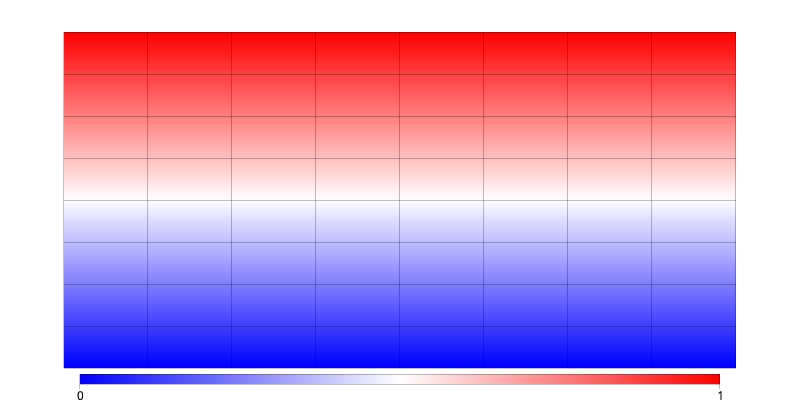

In [28]:
import glucifer
fig = glucifer.Figure(figsize=(800,400))
fig.append( glucifer.objects.Surface(mesh, temperatureField, colours="blue white red") )
fig.append( glucifer.objects.Mesh(mesh) )
fig.show()

Typically we might then setup boundary conditions, particle swarms, rheology and systems to be solved.

All of these topics are discussed in the following sections of the user guide.